In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('merged_with_altitude_and_FiO2.csv')
df.head()

,timestamp,hr,prt,spv,participant,altitude,fio2,inter,target,FiO2
0,2023-02-17 09:16:12,159.615385,135.416667,85.714286,217a,2.0,0.041812,0.043903,0.082368,56.503205
1,2023-02-17 09:16:13,151.923077,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.078991,55.213141
2,2023-02-17 09:16:14,151.923077,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.078991,55.213141
3,2023-02-17 09:16:15,136.538462,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.072237,53.674679
4,2023-02-17 09:16:16,125.000000,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.067171,52.520833


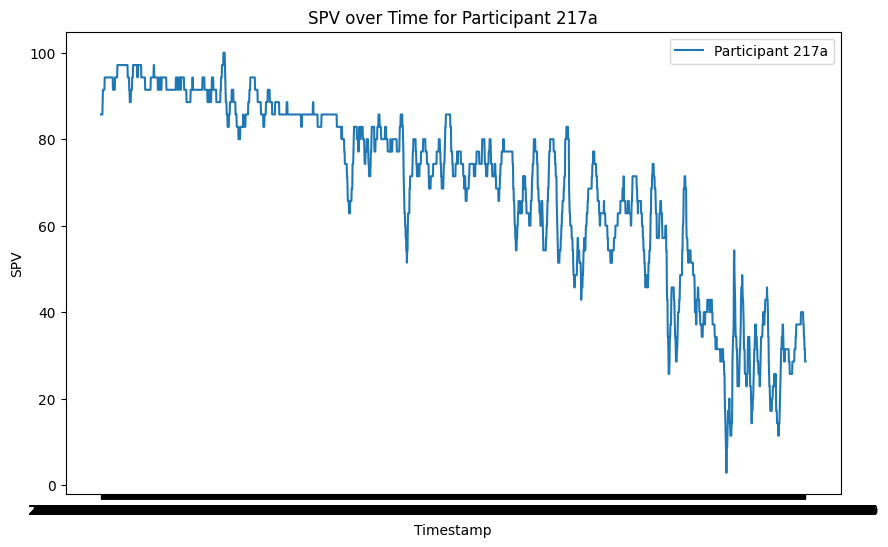

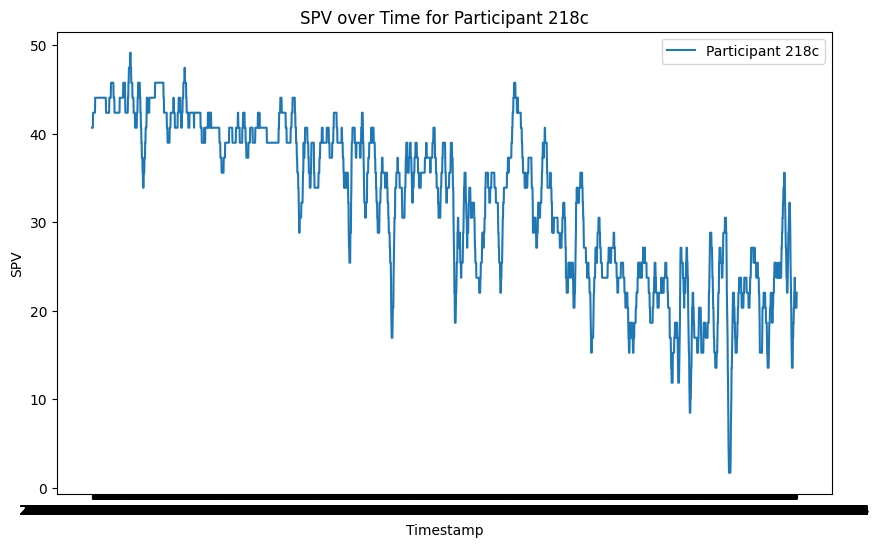

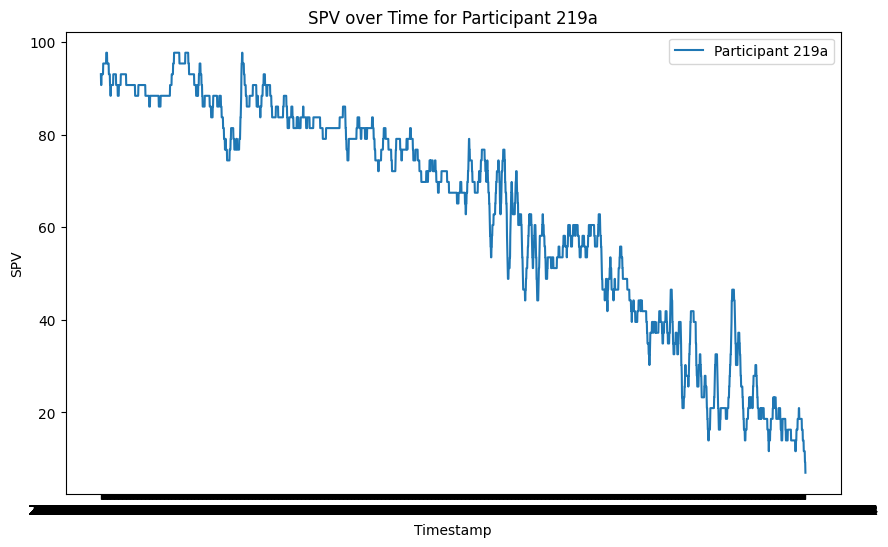

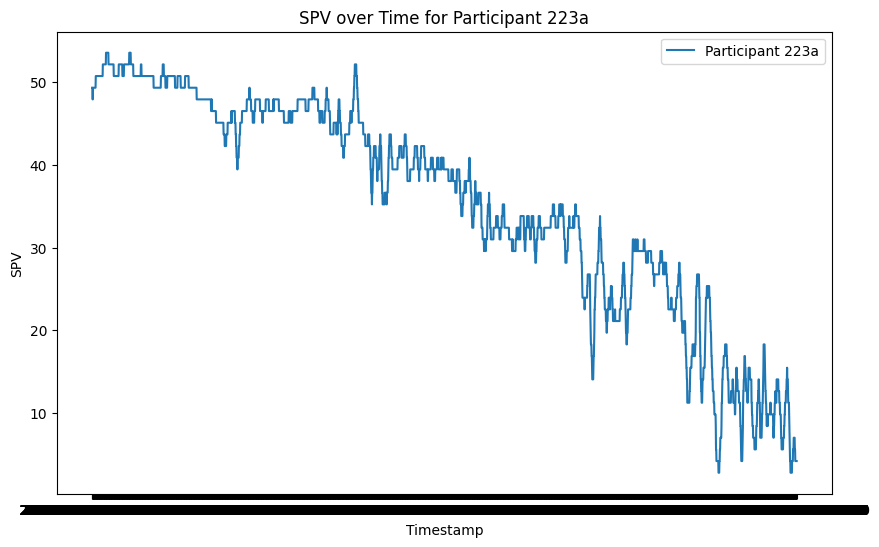

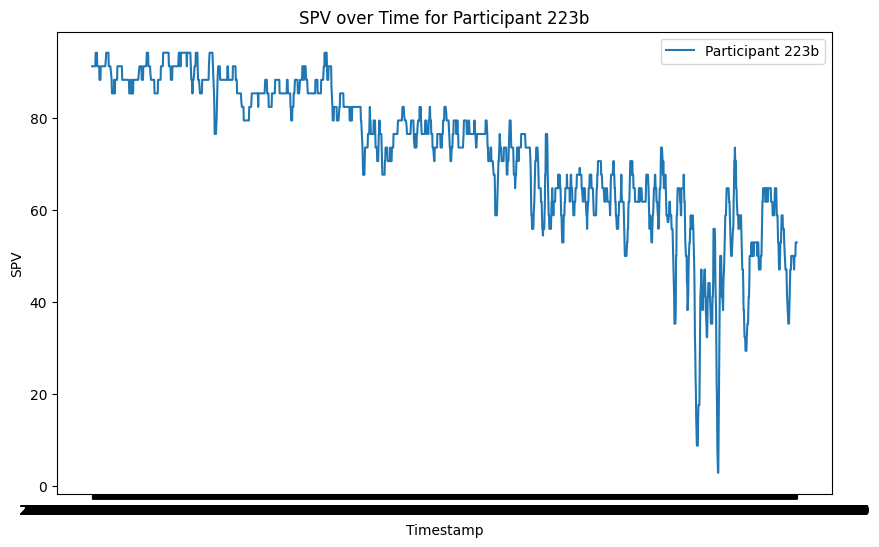

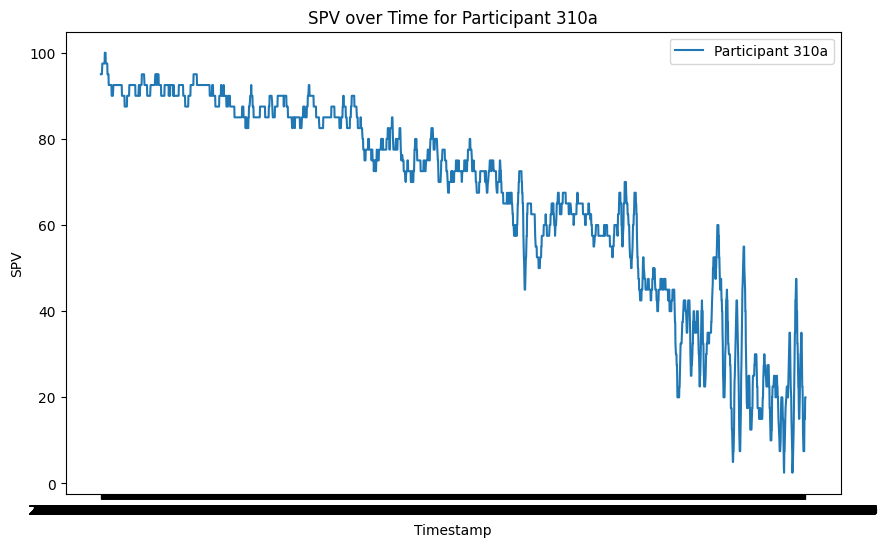

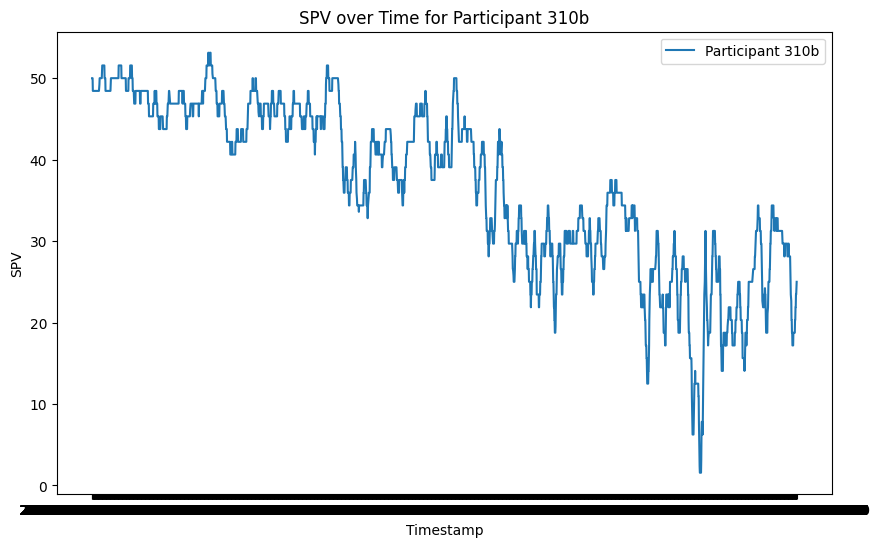

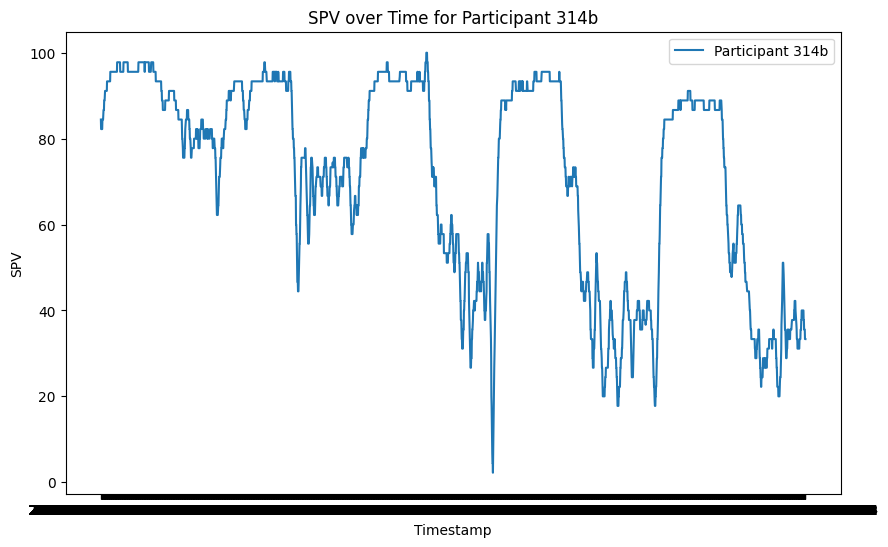

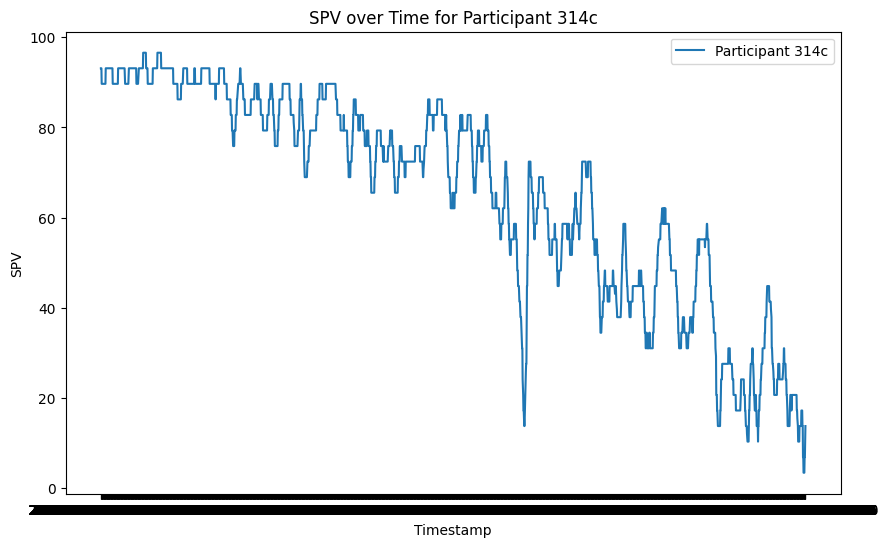

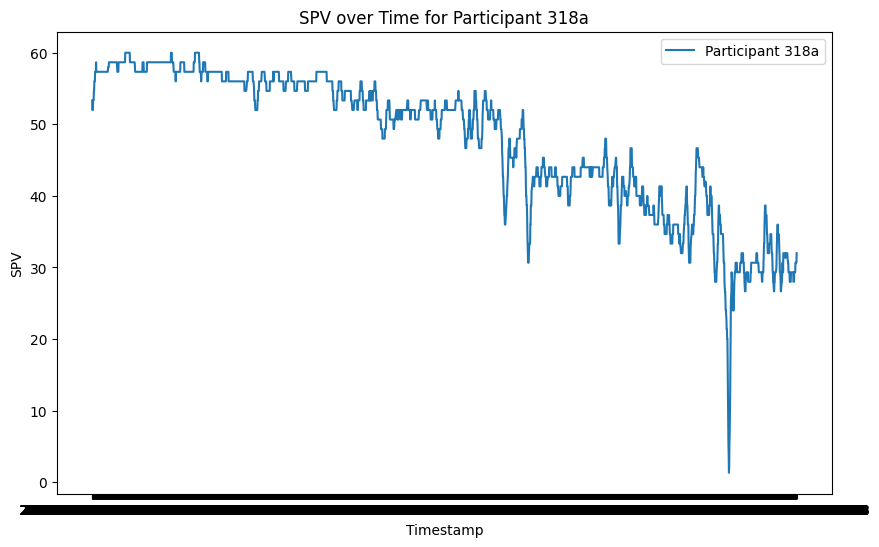

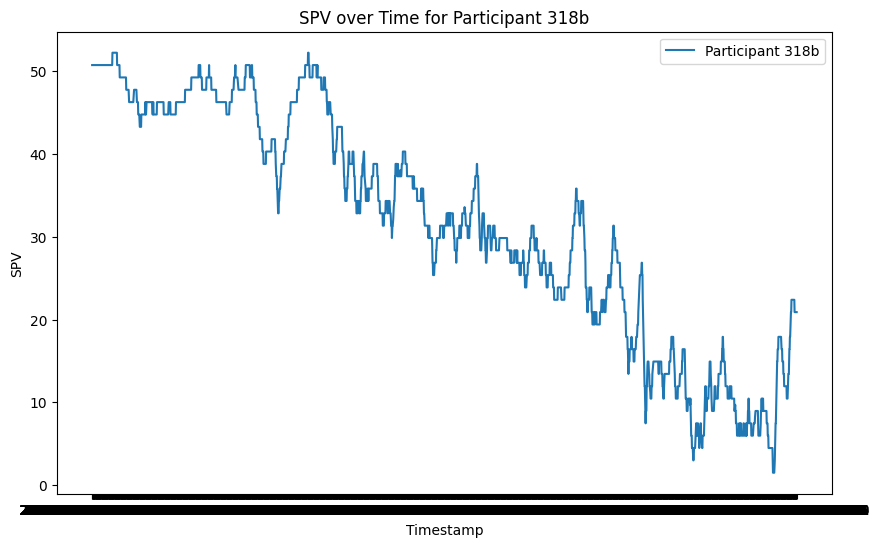

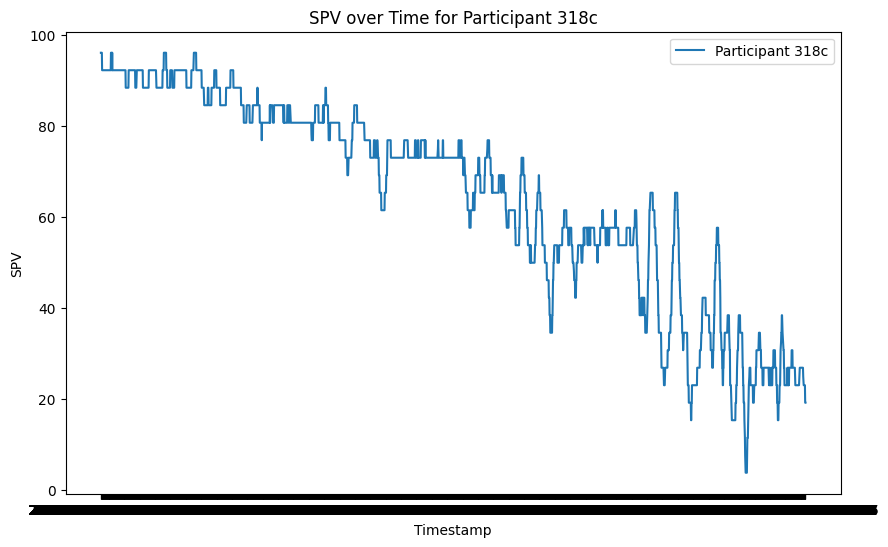

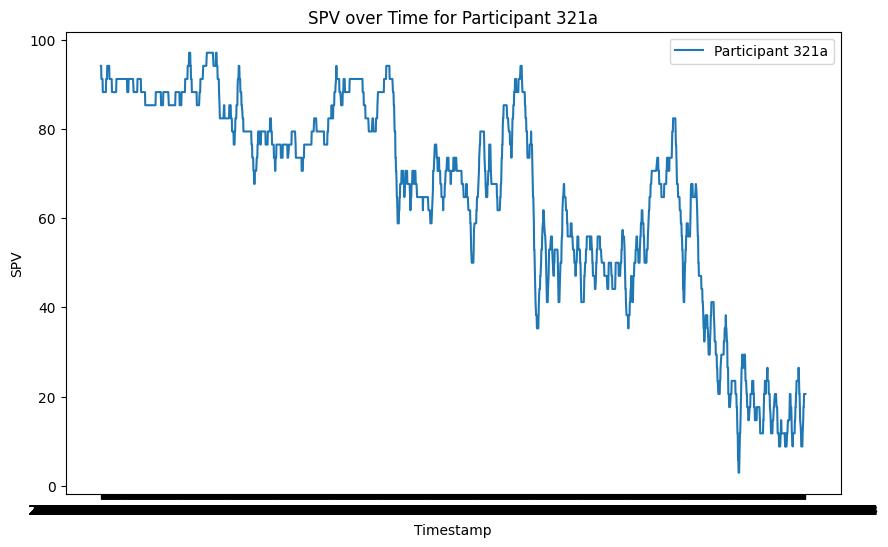

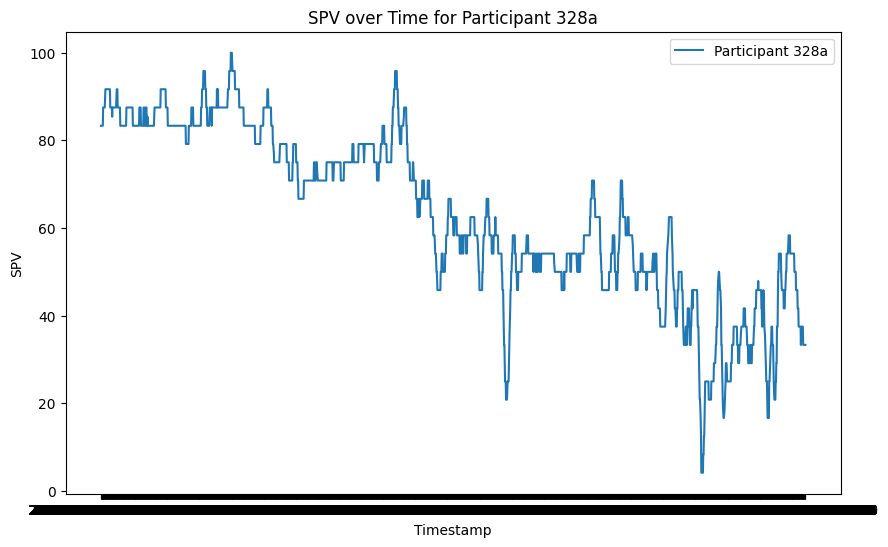

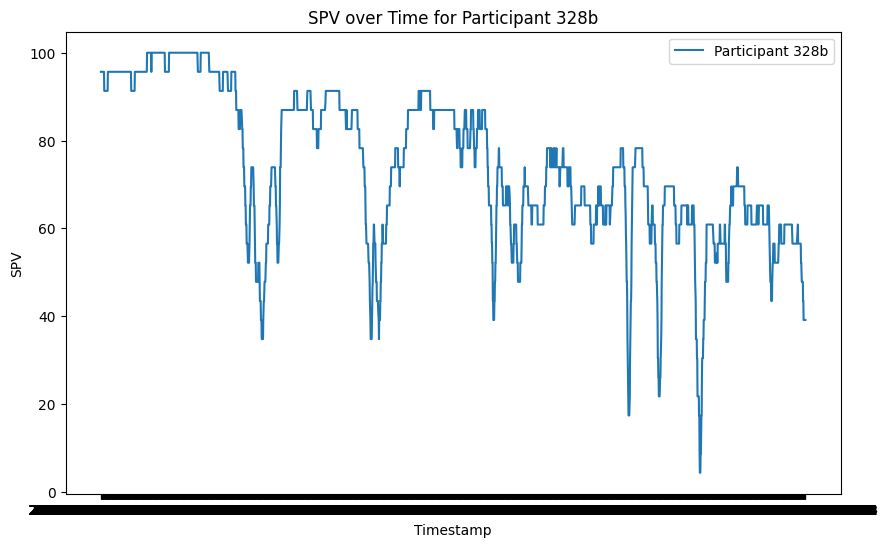

In [3]:
import matplotlib.pyplot as plt

participants = df['participant'].unique()
for participant in participants:
    plt.figure(figsize=(10, 6))
    participant_data = df[df['participant'] == participant]
    plt.plot(participant_data['timestamp'], participant_data['spv'], label=f'Participant {participant}')
    plt.xlabel('Timestamp')
    plt.ylabel('SPV')
    plt.title(f'SPV over Time for Participant {participant}')
    plt.legend()
    plt.show()

In [4]:
df.head()

,timestamp,hr,prt,spv,participant,altitude,fio2,inter,target,FiO2
0,2023-02-17 09:16:12,159.615385,135.416667,85.714286,217a,2.0,0.041812,0.043903,0.082368,56.503205
1,2023-02-17 09:16:13,151.923077,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.078991,55.213141
2,2023-02-17 09:16:14,151.923077,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.078991,55.213141
3,2023-02-17 09:16:15,136.538462,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.072237,53.674679
4,2023-02-17 09:16:16,125.000000,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.067171,52.520833


In [5]:
# Define bins for spv
bins = range(0, 101, 10)  # Bins from 0 to 100 with a width of 10
labels = [f'{i}-{i+10}' for i in bins[:-1]]

# Bin the spv values
df['spv_group'] = pd.cut(df['spv'], bins=bins, labels=labels, right=False)

# Group by spv_group, altitude, and calculate the average target
result = df.groupby(['spv_group', 'altitude'])['FiO2'].mean().reset_index()

result

<ipython-input-5-26af7d9b0553>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(['spv_group', 'altitude'])['FiO2'].mean().reset_index()


,spv_group,altitude,FiO2
0,0-10,2.0,NaN
1,0-10,2.5,NaN
2,0-10,3.0,66.242156
3,0-10,3.5,61.780403
4,0-10,4.0,65.140492
5,10-20,2.0,NaN
6,10-20,2.5,NaN
7,10-20,3.0,54.398578
8,10-20,3.5,60.725832
9,10-20,4.0,68.482279


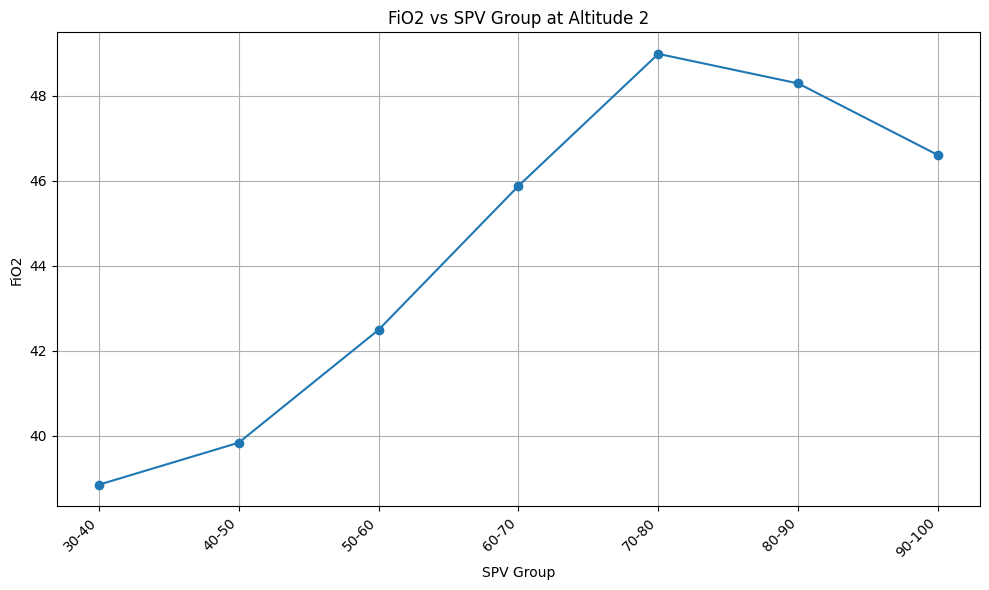

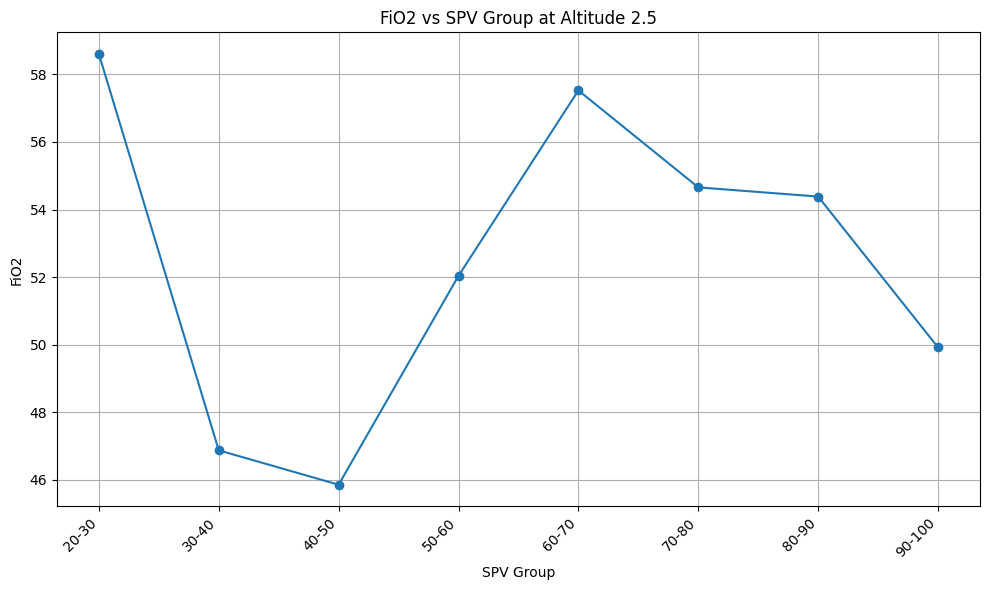

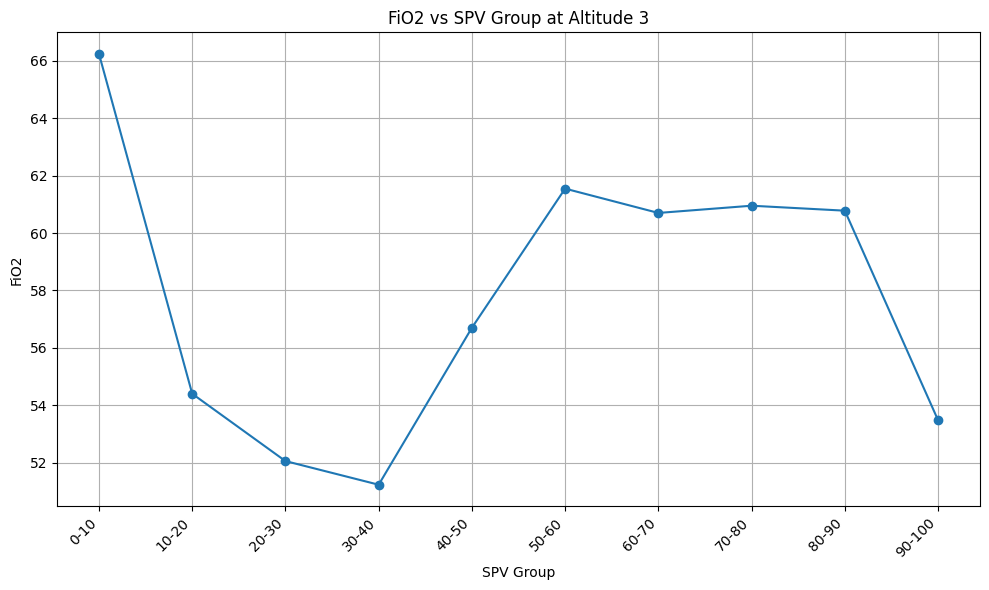

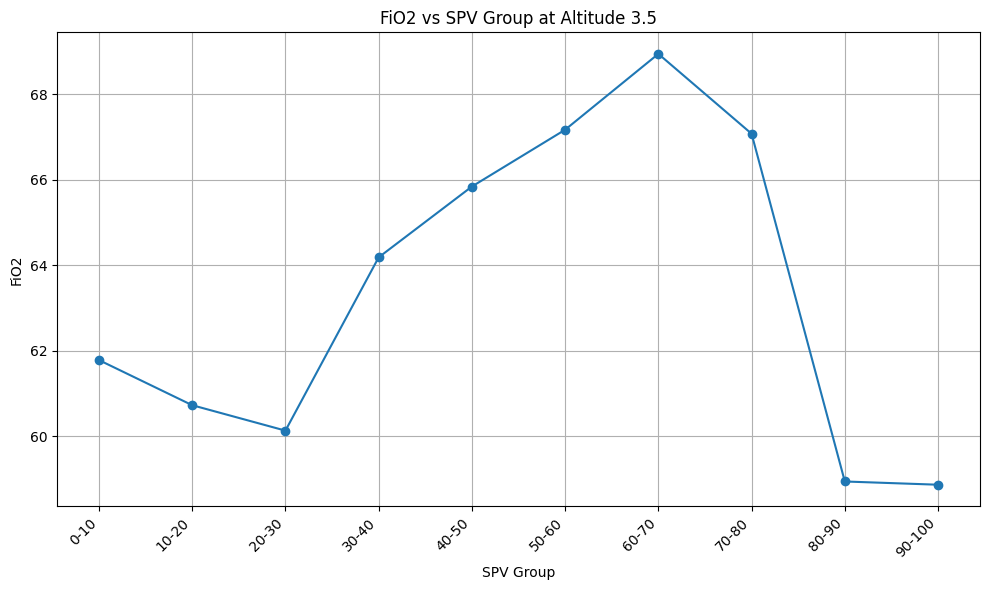

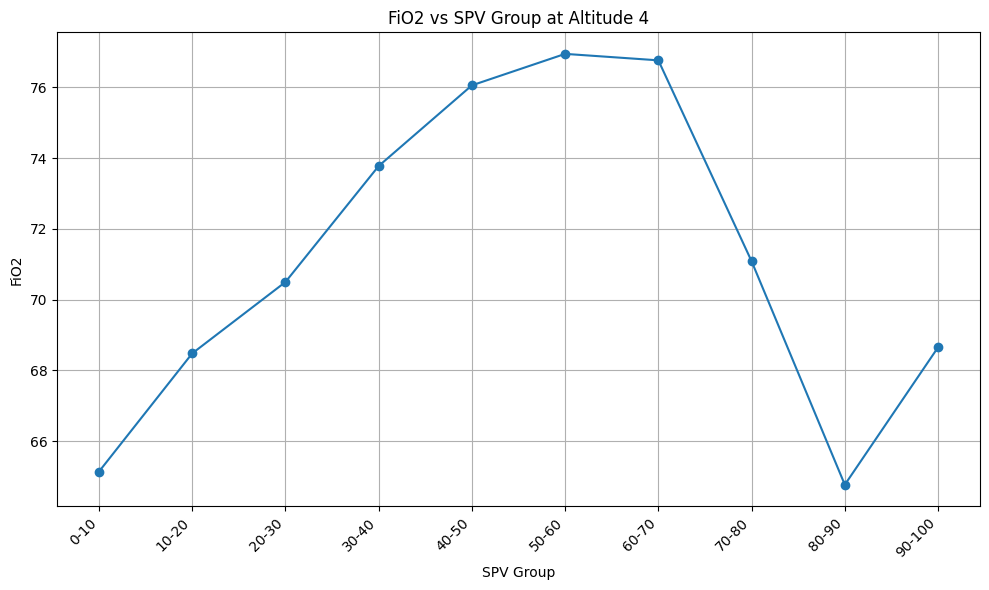

In [6]:
import matplotlib.pyplot as plt

altitudes = [2, 2.5, 3, 3.5, 4]

for altitude in altitudes:
  # Filter data for the current altitude
  altitude_data = result[result['altitude'] == altitude]

  plt.figure(figsize=(10, 6))
  plt.plot(altitude_data['spv_group'], altitude_data['FiO2'], marker='o')
  plt.xlabel('SPV Group')
  plt.ylabel('FiO2')
  plt.title(f'FiO2 vs SPV Group at Altitude {altitude}')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.grid(True)
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show()

### How Respiratory readings varies with increase in altitude??

The human body experiences various physiological changes when exposed to increasing altitudes, primarily due to the reduction in atmospheric pressure and the corresponding decrease in the partial pressure of oxygen. Here's how **heart rate**, **pulse rate**, and **oxygen saturation level** are generally affected:

### 1. **Oxygen Saturation Level (SpO2)**:
   - **At lower altitudes (sea level)**, oxygen saturation levels in healthy individuals are typically in the range of **95% to 100%**.
   - As altitude increases, the partial pressure of oxygen in the atmosphere decreases, leading to a **gradual drop in oxygen saturation** in the blood.
   - At **moderate altitudes (2,000 - 3,500 meters)**, oxygen saturation typically falls to around **90-95%**.
   - At **high altitudes (above 3,500 meters)**, it can drop further, sometimes below **85-90%**, depending on individual acclimatization, activity levels, and altitude.
   - **Hypoxemia** (low blood oxygen) occurs at higher altitudes as the body struggles to maintain adequate oxygen levels in the blood, which may lead to conditions like altitude sickness.

### 2. **Heart Rate (HR)**:
   - To compensate for lower oxygen availability at higher altitudes, the heart has to work harder to pump more oxygen-rich blood throughout the body.
   - **Heart rate increases significantly** at higher altitudes as the body attempts to maintain adequate oxygen delivery to tissues.
   - **At sea level**, a normal resting heart rate is typically around **60-100 beats per minute (bpm)**.
   - At **moderate altitudes (around 2,000-3,000 meters)**, heart rates may increase by **10-30%**.
   - At **higher altitudes (above 3,500 meters)**, the increase in heart rate can be even more pronounced, sometimes reaching **120-150 bpm**, particularly during physical exertion.
   - The increase in heart rate is a **short-term adaptation** to altitude, though heart rate can eventually stabilize as the body acclimatizes.

### 3. **Pulse Rate (PRT)**:
   - The pulse rate, which reflects the number of heartbeats per minute as detected by a peripheral artery (usually at the wrist or neck), typically follows the same pattern as heart rate.
   - As the **body's demand for oxygen increases**, the pulse rate **rises correspondingly** to increase blood flow and oxygen delivery.
   - The change in pulse rate with altitude is essentially the same as that of heart rate, as both are direct indicators of cardiovascular response.
   - During acclimatization, both heart rate and pulse rate may begin to decrease somewhat as the body adjusts to the new altitude, but initially, both will rise sharply with altitude.

### 4. **Other Physiological Changes**:
   - **Breathing rate (respiration rate)** also increases with altitude as the body attempts to intake more oxygen.
   - **Red blood cell production** increases over time (within days to weeks) to improve the oxygen-carrying capacity of the blood. This is part of the longer-term acclimatization process, where the body compensates for low oxygen levels.

### Summary of Changes at Different Altitudes:
| **Altitude**                 | **Oxygen Saturation (SpO2)** | **Heart Rate (HR)**      | **Pulse Rate (PRT)**      |
|------------------------------|------------------------------|--------------------------|---------------------------|
| **Sea Level (0 m)**           | 95-100%                      | 60-100 bpm                | 60-100 bpm                 |
| **Moderate Altitude (2,000 m)**| 90-95%                       | 70-110 bpm                | 70-110 bpm                 |
| **High Altitude (3,500 m)**   | 85-90%                       | 80-130 bpm                | 80-130 bpm                 |
| **Very High Altitude (4,000 m)**| <85%                         | 90-150 bpm                | 90-150 bpm                 |

### Key Adaptations:
- **Immediate Responses**: Increased heart rate, pulse rate, and respiratory rate are the body's first responses to compensate for lower oxygen availability.
- **Acclimatization**: Over time (days to weeks), the body will adjust to altitude by producing more red blood cells to enhance oxygen delivery, which can partially reduce the increase in heart rate and pulse rate seen in the early stages.
- **Variability**: The degree of these changes varies between individuals based on fitness level, age, acclimatization, and altitude.

### Conclusion:
As altitude increases:
- **Oxygen saturation levels decrease**, leading to **hypoxemia** at high altitudes.
- **Heart rate and pulse rate increase** to compensate for the lower oxygen availability by improving circulation.
- With prolonged exposure, the body undergoes acclimatization, adjusting to the lower oxygen levels, but initial increases in heart rate and pulse rate are inevitable.

In [7]:
df.head()

,timestamp,hr,prt,spv,participant,altitude,fio2,inter,target,FiO2,spv_group
0,2023-02-17 09:16:12,159.615385,135.416667,85.714286,217a,2.0,0.041812,0.043903,0.082368,56.503205,80-90
1,2023-02-17 09:16:13,151.923077,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.078991,55.213141,80-90
2,2023-02-17 09:16:14,151.923077,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.078991,55.213141,80-90
3,2023-02-17 09:16:15,136.538462,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.072237,53.674679,80-90
4,2023-02-17 09:16:16,125.000000,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.067171,52.520833,80-90


In [8]:
# prompt: In the dataframe, create a new class with the name Valve Percentage which should basically be, a categorical value whenever FiO2 is between 50-60, it should have the class 50-60 and so on. similarly do for all ranges from 0-10,10-20,30-40...,90-100

def categorize_fio2(fio2):
  if 0 <= fio2 < 10:
    return '0-10'
  elif 10 <= fio2 < 20:
    return '10-20'
  elif 20 <= fio2 < 30:
    return '20-30'
  elif 30 <= fio2 < 40:
    return '30-40'
  elif 40 <= fio2 < 50:
    return '40-50'
  elif 50 <= fio2 < 60:
    return '50-60'
  elif 60 <= fio2 < 70:
    return '60-70'
  elif 70 <= fio2 < 80:
    return '70-80'
  elif 80 <= fio2 < 90:
    return '80-90'
  elif 90 <= fio2 <= 100:
    return '90-100'
  else:
    return 'Unknown'

# Apply the function to the 'FiO2' column and create a new column 'Valve Percentage'
df['Valve_Percentage'] = df['FiO2'].apply(categorize_fio2)

df.head()

,timestamp,hr,prt,spv,participant,altitude,fio2,inter,target,FiO2,spv_group,Valve_Percentage
0,2023-02-17 09:16:12,159.615385,135.416667,85.714286,217a,2.0,0.041812,0.043903,0.082368,56.503205,80-90,50-60
1,2023-02-17 09:16:13,151.923077,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.078991,55.213141,80-90,50-60
2,2023-02-17 09:16:14,151.923077,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.078991,55.213141,80-90,50-60
3,2023-02-17 09:16:15,136.538462,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.072237,53.674679,80-90,50-60
4,2023-02-17 09:16:16,125.000000,130.208333,85.714286,217a,2.0,0.041812,0.043903,0.067171,52.520833,80-90,50-60


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select relevant columns and drop the rest
df = df[['hr', 'spv', 'prt', 'altitude', 'Valve_Percentage']]
df = df.dropna()

# Split the data into features (X) and target (y)
X = df[['hr', 'spv', 'prt', 'altitude']]
y = df['Valve_Percentage']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  return accuracy, report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy, knn_report = train_and_evaluate_model(knn_model, X_train, y_train, X_test, y_test)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", knn_report)

KNN Accuracy: 0.976023250181642
KNN Classification Report:
               precision    recall  f1-score   support

       20-30       0.89      1.00      0.94         8
       30-40       0.98      0.97      0.98       550
       40-50       0.98      0.98      0.98      1865
       50-60       0.98      0.97      0.97      2309
       60-70       0.97      0.98      0.98      2249
       70-80       0.97      0.98      0.98       984
       80-90       0.95      0.96      0.96       266
      90-100       0.91      0.74      0.82        27

    accuracy                           0.98      8258
   macro avg       0.95      0.95      0.95      8258
weighted avg       0.98      0.98      0.98      8258



In [11]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_accuracy, logistic_report = train_and_evaluate_model(logistic_model, X_train, y_train, X_test, y_test)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\n", logistic_report)

Logistic Regression Accuracy: 0.9774763865342698
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       20-30       0.00      0.00      0.00         8
       30-40       0.95      0.95      0.95       550
       40-50       0.98      0.97      0.98      1865
       50-60       0.99      0.98      0.99      2309
       60-70       0.98      1.00      0.99      2249
       70-80       0.98      0.99      0.98       984
       80-90       0.90      0.94      0.92       266
      90-100       1.00      0.04      0.07        27

    accuracy                           0.98      8258
   macro avg       0.85      0.73      0.73      8258
weighted avg       0.98      0.98      0.98      8258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_accuracy, random_forest_report = train_and_evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Classification Report:\n", random_forest_report)



Random Forest Accuracy: 0.9914022765802858
Random Forest Classification Report:
               precision    recall  f1-score   support

       20-30       0.89      1.00      0.94         8
       30-40       0.99      0.99      0.99       550
       40-50       0.99      0.99      0.99      1865
       50-60       0.99      0.99      0.99      2309
       60-70       0.99      0.99      0.99      2249
       70-80       0.99      0.99      0.99       984
       80-90       0.99      0.98      0.98       266
      90-100       1.00      0.93      0.96        27

    accuracy                           0.99      8258
   macro avg       0.98      0.98      0.98      8258
weighted avg       0.99      0.99      0.99      8258



In [13]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_accuracy, decision_tree_report = train_and_evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", decision_tree_report)

Decision Tree Accuracy: 0.9904335190118673
Decision Tree Classification Report:
               precision    recall  f1-score   support

       20-30       0.89      1.00      0.94         8
       30-40       0.99      0.99      0.99       550
       40-50       1.00      0.99      0.99      1865
       50-60       0.99      1.00      0.99      2309
       60-70       0.99      0.99      0.99      2249
       70-80       0.98      0.98      0.98       984
       80-90       0.96      0.97      0.97       266
      90-100       0.96      0.81      0.88        27

    accuracy                           0.99      8258
   macro avg       0.97      0.97      0.97      8258
weighted avg       0.99      0.99      0.99      8258



In [14]:
def train_ann_model(X_train, y_train, X_test, y_test, hidden_layers):
    ann_model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000)
    ann_model.fit(X_train, y_train)
    y_pred = ann_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return ann_model,accuracy, report


hidden_layers = (64, 32, 16, 10)
ann_model, ann_accuracy, ann_report = train_ann_model(X_train, y_train, X_test, y_test, hidden_layers)
print("ANN Accuracy:", ann_accuracy)
print("ANN Classification Report:\n", ann_report)


ANN Accuracy: 0.9893436667473965
ANN Classification Report:
               precision    recall  f1-score   support

       20-30       1.00      1.00      1.00         8
       30-40       1.00      0.97      0.98       550
       40-50       0.99      1.00      0.99      1865
       50-60       0.99      1.00      0.99      2309
       60-70       0.99      0.99      0.99      2249
       70-80       0.99      0.98      0.98       984
       80-90       1.00      0.96      0.98       266
      90-100       0.87      1.00      0.93        27

    accuracy                           0.99      8258
   macro avg       0.98      0.99      0.98      8258
weighted avg       0.99      0.99      0.99      8258



In [15]:
# Select the best model based on accuracy
models = {
    "KNN": knn_model,
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "Decision Tree": decision_tree_model,
    "ANN": ann_model
}

best_model_name = ""
best_model_accuracy = 0

for model_name, model in models.items():
    accuracy, _ = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = model_name

print("Best Model:", best_model_name)
best_model = models[best_model_name]

# Take random 5 samples from the dataset, one from each altitude
altitude_samples = {}
for altitude in altitudes:
    altitude_df = df[df['altitude'] == altitude].sample(1)
    altitude_samples[altitude] = altitude_df

# Predict the result and compare with the actual target values
for altitude, sample_df in altitude_samples.items():
    sample_features = sample_df[['hr', 'spv', 'prt', 'altitude']]
    sample_features = scaler.transform(sample_features)
    predicted_valve_percentage = best_model.predict(sample_features)[0]
    actual_valve_percentage = sample_df['Valve_Percentage'].values[0]

    # Print the actual input values
    print(f"\nAltitude: {altitude}")
    print(f"Input Values: HR: {sample_df['hr'].values[0]}, SPV: {sample_df['spv'].values[0]}, PRT: {sample_df['prt'].values[0]}, Altitude: {sample_df['altitude'].values[0]}")
    print(f"Predicted Valve Percentage: {predicted_valve_percentage}")
    print(f"Actual Valve Percentage: {actual_valve_percentage}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Model: Random Forest

Altitude: 2
Input Values: HR: 95.8904109589041, SPV: 75.0, PRT: 80.64516129032258, Altitude: 2.0
Predicted Valve Percentage: 40-50
Actual Valve Percentage: 40-50

Altitude: 2.5
Input Values: HR: 89.91228070175437, SPV: 42.25352112676056, PRT: 17.955801104972377, Altitude: 2.5
Predicted Valve Percentage: 40-50
Actual Valve Percentage: 40-50

Altitude: 3
Input Values: HR: 78.65168539325842, SPV: 91.11111111111111, PRT: 68.9655172413793, Altitude: 3.0
Predicted Valve Percentage: 50-60
Actual Valve Percentage: 50-60

Altitude: 3.5
Input Values: HR: 140.12738853503186, SPV: 16.417910447761187, PRT: 29.25531914893615, Altitude: 3.5
Predicted Valve Percentage: 50-60
Actual Valve Percentage: 50-60

Altitude: 4
Input Values: HR: 135.76158940397352, SPV: 23.25581395348837, PRT: 88.23529411764704, Altitude: 4.0
Predicted Valve Percentage: 60-70
Actual Valve Percentage: 60-70


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset (assuming your data is loaded into df)
# Split the data into features (X) and target (y)
X = df[['hr', 'spv', 'prt', 'altitude']]
y = df['Valve_Percentage']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    correct_predictions = sum(y_pred == y_test)
    total_predictions = len(y_test)
    return accuracy, report, correct_predictions, total_predictions

# Train and evaluate each model
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy, knn_report, knn_correct_predictions, knn_total_predictions = train_and_evaluate_model(knn_model, X_train, y_train, X_test, y_test)
print("KNN Accuracy:", knn_accuracy)
print(f"KNN Correct Predictions: {knn_correct_predictions}/{knn_total_predictions}")
print("KNN Classification Report:\n", knn_report)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_accuracy, logistic_report, logistic_correct_predictions, logistic_total_predictions = train_and_evaluate_model(logistic_model, X_train, y_train, X_test, y_test)
print("Logistic Regression Accuracy:", logistic_accuracy)
print(f"Logistic Regression Correct Predictions: {logistic_correct_predictions}/{logistic_total_predictions}")
print("Logistic Regression Classification Report:\n", logistic_report)

# Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_accuracy, random_forest_report, random_forest_correct_predictions, random_forest_total_predictions = train_and_evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)
print("Random Forest Accuracy:", random_forest_accuracy)
print(f"Random Forest Correct Predictions: {random_forest_correct_predictions}/{random_forest_total_predictions}")
print("Random Forest Classification Report:\n", random_forest_report)

# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_accuracy, decision_tree_report, decision_tree_correct_predictions, decision_tree_total_predictions = train_and_evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print(f"Decision Tree Correct Predictions: {decision_tree_correct_predictions}/{decision_tree_total_predictions}")
print("Decision Tree Classification Report:\n", decision_tree_report)

# Artificial Neural Network (ANN)
hidden_layers = (64, 32, 16, 10)
ann_model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000)
ann_accuracy, ann_report, ann_correct_predictions, ann_total_predictions = train_and_evaluate_model(ann_model, X_train, y_train, X_test, y_test)
print("ANN Accuracy:", ann_accuracy)
print(f"ANN Correct Predictions: {ann_correct_predictions}/{ann_total_predictions}")
print("ANN Classification Report:\n", ann_report)

# Summary of Correct and Total Predictions
print("\nSummary of Correct and Total Predictions:")
print(f"KNN: {knn_correct_predictions}/{knn_total_predictions}")
print(f"Logistic Regression: {logistic_correct_predictions}/{logistic_total_predictions}")
print(f"Random Forest: {random_forest_correct_predictions}/{random_forest_total_predictions}")
print(f"Decision Tree: {decision_tree_correct_predictions}/{decision_tree_total_predictions}")
print(f"ANN: {ann_correct_predictions}/{ann_total_predictions}")


KNN Accuracy: 0.976023250181642
KNN Correct Predictions: 8060/8258
KNN Classification Report:
               precision    recall  f1-score   support

       20-30       0.89      1.00      0.94         8
       30-40       0.98      0.97      0.98       550
       40-50       0.98      0.98      0.98      1865
       50-60       0.98      0.97      0.97      2309
       60-70       0.97      0.98      0.98      2249
       70-80       0.97      0.98      0.98       984
       80-90       0.95      0.96      0.96       266
      90-100       0.91      0.74      0.82        27

    accuracy                           0.98      8258
   macro avg       0.95      0.95      0.95      8258
weighted avg       0.98      0.98      0.98      8258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.9774763865342698
Logistic Regression Correct Predictions: 8072/8258
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       20-30       0.00      0.00      0.00         8
       30-40       0.95      0.95      0.95       550
       40-50       0.98      0.97      0.98      1865
       50-60       0.99      0.98      0.99      2309
       60-70       0.98      1.00      0.99      2249
       70-80       0.98      0.99      0.98       984
       80-90       0.90      0.94      0.92       266
      90-100       1.00      0.04      0.07        27

    accuracy                           0.98      8258
   macro avg       0.85      0.73      0.73      8258
weighted avg       0.98      0.98      0.98      8258

Random Forest Accuracy: 0.9917655606684427
Random Forest Correct Predictions: 8190/8258
Random Forest Classification Report:
               precision    recall  f1-score   support

       20-30       0.89 